# Topic mining exploration of text data from the french 'Grand debat'

In [2]:
# Importing modules
import pandas as pd
import os

In [3]:
# Read data
text_ecolo = pd.read_csv('C:/Users/ben.vdb/Documents/Data/GrandDebat/LA_TRANSITION_ECOLOGIQUE.csv')
# Print head
text_ecolo.head()
text_ecolo.columns

c:\users\ben.vdb\.conda\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['reference', 'title', 'createdAt', 'publishedAt', 'updatedAt',
       'trashed', 'trashedStatus', 'authorId', 'authorType', 'authorZipCode',
       'Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?',
       'Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?',
       'Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique ?',
       'Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?',
       'À titre personnel, pensez-vous pouvoir contribuer à protéger l'environnement ?',
       'Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?',
       'Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?',
   

### Data Cleaning
Remove unused columns, punctuation, all in lower case


In [4]:
# Remove the unused columns
text_ecolo = text_ecolo.drop(columns=['reference', 'createdAt', 'publishedAt', 'updatedAt',
       'trashed', 'trashedStatus', 'authorId', 'authorType', 'authorZipCode'], axis=1)
# Print out the first rows of papers
text_ecolo.head()

,title,Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?,Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?,Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique ?,"Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?","À titre personnel, pensez-vous pouvoir contribuer à protéger l'environnement ?","Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?","Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?",Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?,"Par rapport à votre mode de chauffage actuel, pensez-vous qu'il existe des solutions alternatives plus écologiques ?","Si oui, que faudrait-il faire pour vous convaincre ou vous aider à changer de mode de chauffage ?","Avez-vous pour vos déplacements quotidiens la possibilité de recourir à des solutions de mobilité alternatives à la voiture individuelle comme les transports en commun, le covoiturage, l'auto-partage, le transport à la demande, le vélo, etc. ?","Si oui, que faudrait-il faire pour vous convaincre ou vous aider à utiliser ces solutions alternatives ?","Si non, quelles sont les solutions de mobilité alternatives que vous souhaiteriez pouvoir utiliser ?",Et qui doit selon vous se charger de vous proposer ce type de solutions alternatives ?,Que pourrait faire la France pour faire partager ses choix en matière d'environnement au niveau européen et international ?,Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?
0,transition écologique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enseignement du tri sélectif à l'école,Multiplier les centrales géothermiques
1,La surpopulation,Les problèmes auxquels se trouve confronté l’e...,Les problèmes auxquels se trouve confronté l’e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mettre en oeuvre au niveau national ses engage...,Les problèmes auxquels se trouve confronté l’e...
2,climat,"Les dérèglements climatiques (crue, sécheresse)",pour éviter les inondations obliger les rivera...,Non,NaN,Non,NaN,"développer les transports en commun ,",NaN,Non,NaN,Oui,NaN,"Les transports en commun, L'auto partage, Le t...",NaN,NaN,NaN
3,POLLUTION AIR EAU,La pollution de l'air,Il faut taxer les gros pollueurs : Entreprises...,Non,NaN,Non,NaN,NaN,Plus de transports publics dans les petites co...,Non,NaN,Non,Le co-voiturage ne correspond pas toujours aux...,Les transports en commun,L'Etat,Elle n'a aucun pouvoir. Impossible de contrain...,NaN
4,Economie vs Ecologie,La biodiversité et la disparition de certaines...,"Changer notre mode de vie, impulser une nouvel...",Oui,"Pollution de l'air, pollution de nos aliments,...",Oui,"En consommant autrement, en vivant autrement.","Aménagement de piste cyclable, développement d...","Détaxer le mode de chauffage écologique, une a...",Oui,une aide significative pour de l'éolien ou du ...,Non,Une piste cyclable pour éviter de risquer ma v...,"Les transports en commun, Le covoiturage, Le vélo","La commune, le département, la région",Demander à Nicolas Hulot,Une vrai politique écologique et non économique


In [5]:
import re
# Drop NA observations
autres_points = text_ecolo.iloc[:,16].dropna()
# convert to string
autres_points = autres_points.apply(str)
# Remove punctuation
# autres_points = autres_points.map(lambda x: re.sub('[;\,\.!?]-\’–\(|\)', ' ', x))
# autres_points = autres_points.map(lambda x: re.sub('l’', 'l’ ', x))
# autres_points = autres_points.map(lambda x: re.sub('d’', 'd’ ', x))
# autres_points = autres_points.map(lambda x: re.sub('s’', 's’ ', x))

autres_points = autres_points.map(lambda x: re.sub(r'[^\w\s]',' ',x))
# Convert the titles to lowercase
autres_points = autres_points.map(lambda x: x.lower())
# Print out the first rows
autres_points.head()

0               multiplier les centrales géothermiques
1    les problèmes auxquels se trouve confronté l e...
4      une vrai politique écologique et non économique
5    les bonnes idées ne grandissent que par le par...
6    pédagogie dans ce sens là dés la petite école ...
Name: Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?, dtype: object

## Remove stopwords with spacy

In [2]:
import spacy
print('spaCy Version: %s' % (spacy.__version__))

spaCy Version: 2.1.3


In [3]:
spacy_nlp = spacy.load('fr')

In [84]:
spacy_stopwords = spacy.lang.fr.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(spacy_stopwords))
print('First 100 stop words: %s' % list(spacy_stopwords)[:600])

# remove stop words
autres_points = autres_points.apply(lambda x: ' '.join([word for word in x.split() if word not in (spacy_stopwords)]))
autres_points.head()

Number of stop words: 600
First 100 stop words: ['couic', 'selon', 'quelle', 'celles-ci', 'donc', 'subtiles', 'hui', 'suffisant', 'laisser', 'lesquelles', 'mais', 'avais', 'aussi', 'seule', 'cinquantaine', 'mienne', 'hurrah', 'mince', 'toi-même', 'ayant', 'n’', 'huit', 'sait', 'toutes', 'quatorze', 'ceux-ci', 'notre', 'aura', 'etais', 'même', 'celui', 'specifique', 'prealable', 'ouste', 'precisement', 'première', 'ceci', 'elles-mêmes', 'relative', 'sera', 'nôtres', 'avec', 'différent', 'quelque', 'douzième', 'aie', 'quelles', 'maximale', 'nombreuses', 'lors', 'lui-même', 'permet', 'sacrebleu', 'rendre', 'c’', 'pendant', 'attendu', 'puisque', 'envers', 'moi', 'derriere', 'soi', 'qui', 'ohé', 'siens', 'vos', 'beau', 'vivat', 'et', 'relativement', 'lès', 'hem', 'lesquels', 'possibles', 'té', 'plutôt', 'quant-à-soi', 'nous', 'vôtres', 'façon', 'via', 'autres', 'sein', 'semblent', 'fait', 'quanta', 'hi', 'sur', 'divers', "c'", 'particulière', 'seraient', 'longtemps', 'depuis', 'seul', 'alla

0                   multiplier centrales géothermiques
1    problèmes trouve confronté l ensemble planète ...
4                 vrai politique écologique économique
5    bonnes idées grandissent partage jours pénible...
6    pédagogie sens dés petite école sensibilisatio...
Name: Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?, dtype: object

## wordcloud

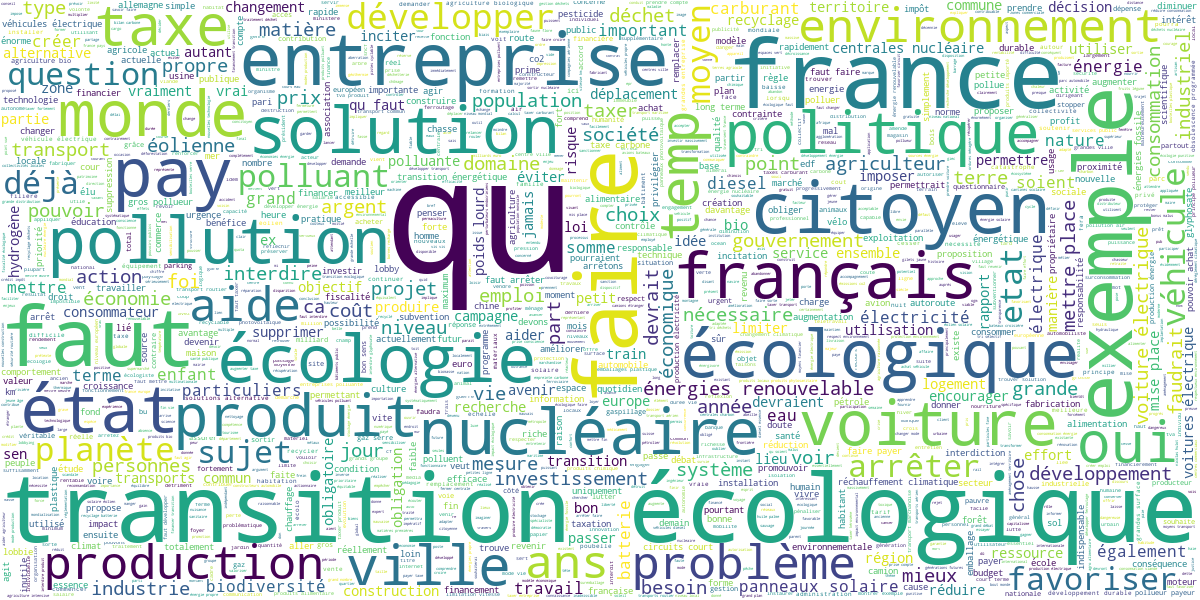

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed text together.
long_string = ','.join((list(autres_points.values)))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=1200, height=600)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Prepare text for LDA
Count vectorization

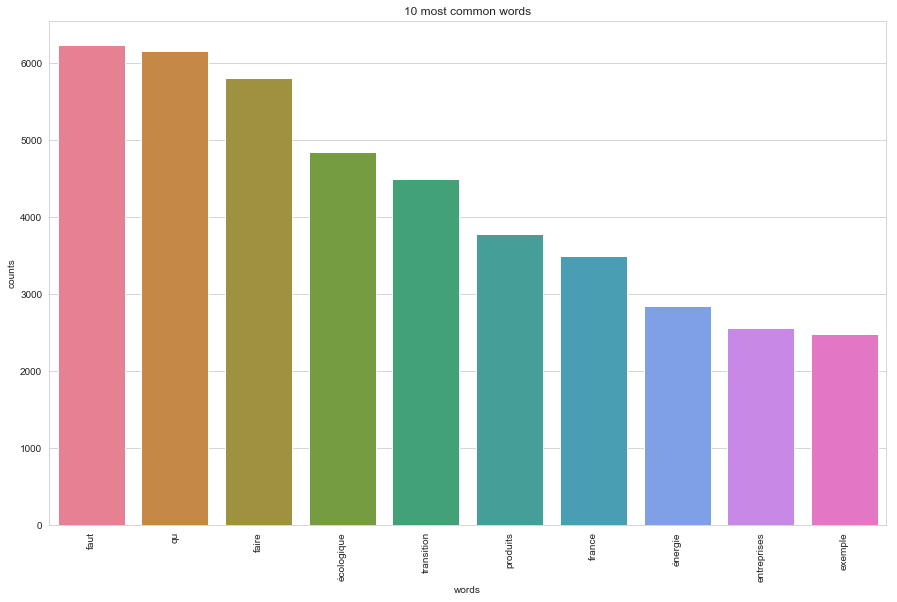

In [83]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer (no stop word list)
count_vectorizer = CountVectorizer() #stop_words='french')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(autres_points)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## LDA with sklearn

In [86]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
you the animaux it to we that of this and

Topic #1:
énergie qu électrique nucléaire voiture véhicules électricité france faut production

Topic #2:
transition écologique faut qu faire écologie monde pays environnement citoyens

Topic #3:
produits interdire bio agriculture déchets entreprises favoriser faire pesticides faut

Topic #4:
taxer transport taxe pollueurs transports camions france avions pollution gros


In [88]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'w') as f:
            pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

c:\users\ben.vdb\.conda\envs\nlp\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: write() argument must be str, not bytes

## LDA with gensim

### Text cleaning

In [11]:
import spacy
spacy.load('fr')
from spacy.lang.fr import French
parser = French()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [12]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer

def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ben.vdb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
nltk.download('stopwords')
fr_stop = set(nltk.corpus.stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ben.vdb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in fr_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [15]:
import random
text_data = []

autres_points = text_ecolo.iloc[:,16].dropna()
autres_points = autres_points.apply(str)

main_problem = text_ecolo.iloc[:,1].dropna()
# convert to string
main_problem = main_problem.apply(str)

for line in main_problem:
    tokens = prepare_text_for_lda(line)
    if random.random() > .99:
        print(tokens)
        text_data.append(tokens)

['pollution']
['pollution', 'produits', 'chimiques', 'utilisés', 'agriculture']
['dérèglements', 'climatiques', 'sécheresse']
['dérèglements', 'climatiques', 'sécheresse']
['surexploitation', 'ressource', 'planète', 'ainsi', 'biodiversité', 'disparition', 'espèces']
['croire', 'nature', 'abrite']
['dérèglements', 'climatiques', 'sécheresse']
['biodiversité', 'disparition', 'certaines', 'espèces']
['impossible', 'faire', 'priorité', 'entre', 'différents', 'problèmes', 'totalement', 'intriqués', 'pollution', 'contribue', 'cause', 'dérèglement', 'climatique', 'celui', 'provoque', 'érosion', 'littoral']
['quête', 'permanente', 'croissance', 'politiques', 'mondiales', 'créer', 'activité', 'richesse', 'provoque', 'déprise', 'foncière', 'agricole', 'forestière', 'pollution', 'catastrophe', 'perte', 'biodiversité', 'concentration', 'urbaine', 'pillage', 'ressources', 'maritimes', 'terrestres', 'omnipotence', 'homme', 'développement', 'source', 'difficultés', 'environnementale', 'planète']
['po

In [16]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [17]:
import gensim

NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=5)

for topic in topics:
    print(topic)

(0, '0.059*"déchets" + 0.028*"climatique" + 0.022*"réchauffement" + 0.017*"pesticide" + 0.017*"nucléaires"')
(1, '0.245*"dérèglements" + 0.245*"climatiques" + 0.233*"sécheresse" + 0.007*"santé" + 0.005*"problème"')
(2, '0.270*"pollution" + 0.020*"faire" + 0.016*"problèmes" + 0.013*"alors" + 0.011*"autres"')
(3, '0.137*"biodiversité" + 0.135*"espèces" + 0.129*"disparition" + 0.123*"certaines" + 0.014*"climatique"')
(4, '0.018*"importants" + 0.018*"tout" + 0.018*"autre" + 0.018*"climat" + 0.018*"arrêter"')


In [18]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

c:\users\ben.vdb\.conda\envs\nlp\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
